## ........................................Rental property analysis in Germany..............................................
## Task 4 - Supervised Machine Learning

#### 1.Import Libraries
#### 2.Import Data
#### 3.Data Cleaning
#### 4.Data prep for regression analysis
#### 5.Regression analysis
#### 6.Performance improvement after removing outliers

# 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# 2.Import Data

In [3]:
# create path

path = r"C:\Users\ponni\Achievement 6"

In [4]:
# Import original data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'immodata_new7.csv'), index_col = False)

# 3.Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209079 entries, 0 to 209078
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        209079 non-null  int64  
 1   State             209079 non-null  object 
 2   City              209079 non-null  object 
 3   Pincode           209079 non-null  int64  
 4   Year_constructed  209079 non-null  int64  
 5   Rent              209079 non-null  float64
 6   Base_rent         209079 non-null  float64
 7   Maintenance_fee   209079 non-null  float64
 8   Area(m2)          209079 non-null  float64
 9   Rooms             209079 non-null  int64  
 10  Heating_type      209079 non-null  object 
 11  House_condition   209079 non-null  object 
 12  TV_offer          209079 non-null  object 
 13  Newly_built       209079 non-null  bool   
 14  Balcony           209079 non-null  bool   
 15  Picture_count     209079 non-null  int64  
 16  Price_trend       20

In [6]:
#Removing unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Floor', axis=1, inplace=True)

In [7]:
df.head()

,State,City,Pincode,Year_constructed,Rent,Base_rent,Maintenance_fee,Area(m2),Rooms,Heating_type,...,Balcony,Picture_count,Price_trend,Kitchen,Cellar,Lift,Flat_type,Garden,Price_per_m2,Rent_range
0,Nordrhein_Westfalen,Dortmund,44269,1965,840.00,595.0,245.00,86.00,4,central_heating,...,False,6,4.62,False,True,False,ground_floor,True,6.918605,Average rent
1,Rheinland_Pfalz,Rhein_Pfalz_Kreis,67459,1871,934.00,800.0,134.00,89.00,3,self_contained_central_heating,...,True,8,3.47,False,False,False,ground_floor,False,8.988764,low rent
2,Sachsen,Dresden,1097,2019,1220.00,965.0,255.00,83.80,3,floor_heating,...,True,8,2.72,False,True,True,apartment,False,11.515513,High rent
3,Sachsen,Mittelsachsen_Kreis,9599,1964,401.15,343.0,58.15,58.15,3,district_heating,...,True,9,1.53,False,False,False,other,False,5.898538,Average rent
4,Bremen,Bremen,28213,1950,903.00,765.0,138.00,84.97,3,self_contained_central_heating,...,True,19,2.46,False,False,False,apartment,False,9.003178,Average rent


In [28]:
df.shape

(209079, 23)

## Check missing values

In [29]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

State               0
City                0
Pincode             0
Year_constructed    0
Rent                0
Base_rent           0
Maintenance_fee     0
Area(m2)            0
Rooms               0
Heating_type        0
House_condition     0
TV_offer            0
Newly_built         0
Balcony             0
Picture_count       0
Price_trend         0
Kitchen             0
Cellar              0
Lift                0
Flat_type           0
Garden              0
Price_per_m2        0
Rent_range          0
dtype: int64

## Duplicates check

In [30]:
dups = df.duplicated()

In [31]:
dups.shape # No dups

(209079,)

## Extreme values checks

C:\Users\ponni\AppData\Local\Temp\ipykernel_12176\3767174492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_per_m2'], bins=25) # Shows extreme values


<AxesSubplot: xlabel='Price_per_m2', ylabel='Density'>

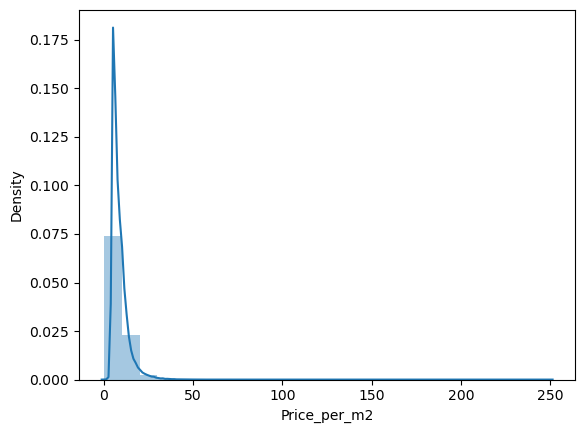

In [34]:
sns.distplot(df['Price_per_m2'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [35]:
df['Price_per_m2'].describe()

count    209079.000000
mean          8.707519
std           4.625243
min           0.029412
25%           5.625000
50%           7.403651
75%          10.251256
max         250.000000
Name: Price_per_m2, dtype: float64

# 4.Data prep for regression analysis

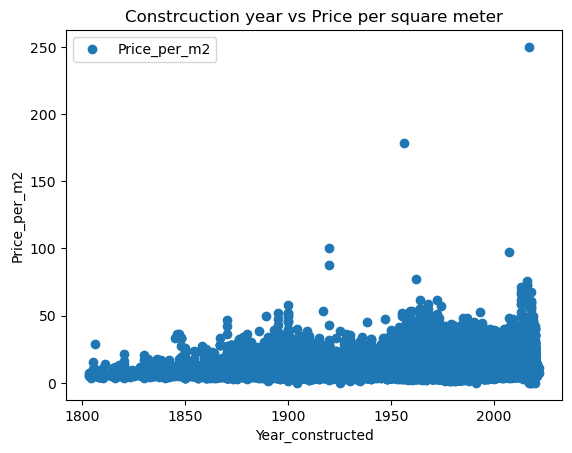

In [36]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year_constructed', y='Price_per_m2',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Constrcuction year vs Price per square meter')  
plt.xlabel('Year_constructed')  
plt.ylabel('Price_per_m2')  
plt.show()

In [37]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Year_constructed'].values.reshape(-1,1)
y = df['Price_per_m2'].values.reshape(-1,1)

In [38]:
X

array([[1965],
       [1871],
       [2019],
       ...,
       [1965],
       [2019],
       [1972]], dtype=int64)

In [39]:
y

array([[ 6.91860465],
       [ 8.98876404],
       [11.51551313],
       ...,
       [ 6.84210526],
       [12.        ],
       [12.14285714]])

In [40]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5.Regression analysis

In [41]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [42]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

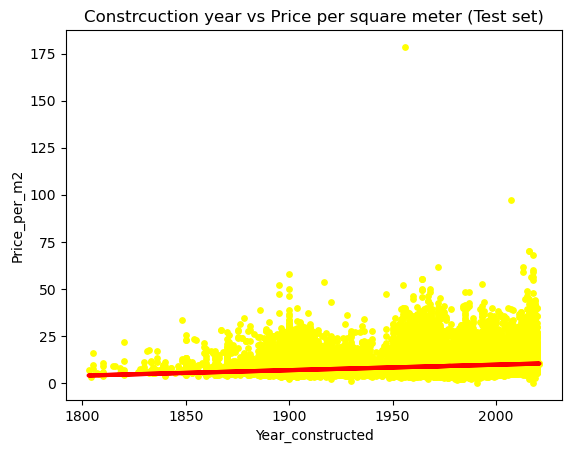

In [44]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='yellow', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Constrcuction year vs Price per square meter (Test set)')
plot_test.xlabel('Year_constructed')
plot_test.ylabel('Price_per_m2')
plot_test.show()

In [45]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [46]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02903566]]
Mean squared error:  20.620688573244326
R2 score:  0.05739361170609614


#### A positive slope indicates a positive relationship as Year of construction rises the price per m2 also rises. R2 is not that great as the value is closer to zero.

In [47]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,11.000000,8.762668
1,11.029412,10.156380
2,4.292035,7.078600
3,6.300000,7.833527
4,6.200029,9.227239
5,11.000000,10.040237
6,11.997768,8.675561
7,5.552471,5.046103
8,10.421053,8.762668
9,13.061224,10.185415


### Compare how the regression fits the training set

In [48]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [49]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [50]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02903566]]
Mean squared error:  19.939834152926693
R2 score:  0.058799215742829425


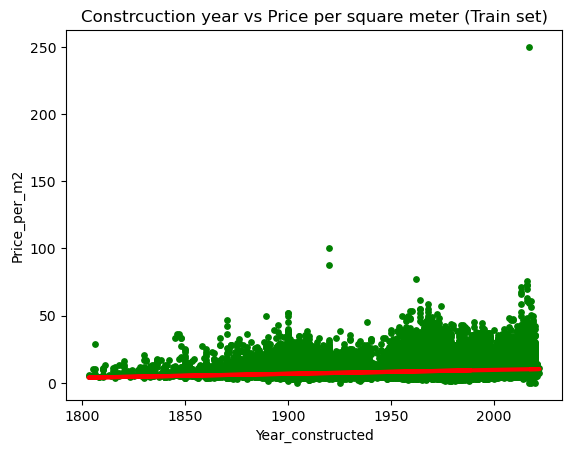

In [51]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Constrcuction year vs Price per square meter (Train set)')
plot_test.xlabel('Year_constructed')
plot_test.ylabel('Price_per_m2')
plot_test.show()

# 6.Perfomance improvement after removing outliers

In [52]:
# Clean the extreme values from the "Price per m2" variable observed during the consistency checks.

df_test = df[df['Price_per_m2'] <=50] 

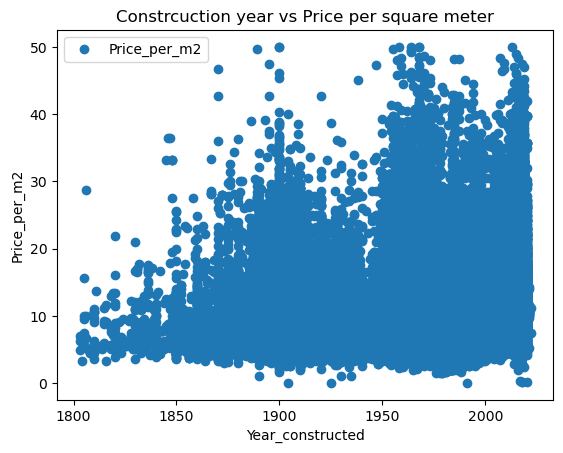

In [53]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Year_constructed', y='Price_per_m2', style='o')  
plt.title('Constrcuction year vs Price per square meter')  
plt.xlabel('Year_constructed')  
plt.ylabel('Price_per_m2')  
plt.show()

In [54]:
# Reshape again.

X_2 = df_test['Year_constructed'].values.reshape(-1,1)
y_2 = df_test['Price_per_m2'].values.reshape(-1,1)

In [55]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [56]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [57]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [58]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [59]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02856851]]
Mean squared error:  19.09067622075395
R2 score:  0.06356472916096212


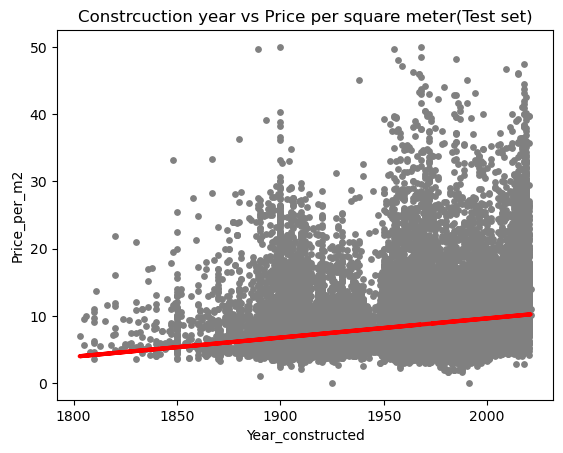

In [60]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Constrcuction year vs Price per square meter(Test set)')
plot_test.xlabel('Year_constructed')
plot_test.ylabel('Price_per_m2')
plot_test.show()

In [66]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,12.058362,8.864956
1,10.400000,9.407758
2,10.011137,9.579169
3,11.533981,10.093402
4,9.701831,10.150539
5,10.600000,9.207779
6,5.993151,9.464895
7,6.666667,8.322155
8,11.483489,8.350723
9,13.001476,10.179108


# Hypothesis: Newer the rental property is, Higher the rental price.

#### Right off the bat, we can see there’s quite the difference between the actual and predicted y values. This just adds evidence to the fact that the model isn’t doing a great job of explaining the relationship between the “Year of construction” and “Price per m2” variables.